<a href="https://colab.research.google.com/github/meidianarahmawati/mlt2hc7/blob/meidiana/Final%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project Kelompok Healthcare 7 



## Dataset


In [1]:
!wget https://raw.githubusercontent.com/meidianarahmawati/mlt2hc7/main/dataset.csv
!wget https://raw.githubusercontent.com/meidianarahmawati/mlt2hc7/main/symptom_Description.csv
!wget https://raw.githubusercontent.com/meidianarahmawati/mlt2hc7/main/symptom_precaution.csv

--2022-07-13 07:19:10--  https://raw.githubusercontent.com/meidianarahmawati/mlt2hc7/main/dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 632202 (617K) [text/plain]
Saving to: ‘dataset.csv.5’

dataset.csv.5       100%[===================>] 617.38K  --.-KB/s    in 0.04s   

2022-07-13 07:19:11 (14.7 MB/s) - ‘dataset.csv.5’ saved [632202/632202]

--2022-07-13 07:19:11--  https://raw.githubusercontent.com/meidianarahmawati/mlt2hc7/main/symptom_Description.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11025 (11K) [te

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## Exploratory Data Analysis

Pada bagian berikut ini akan dilakukan exploratory data analysis pada dataset.csv untuk melihat profil datanya.


In [3]:
df = pd.read_csv('dataset.csv')

In [4]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Preprocessing

Pada bagian berikut ini kolom symptom pada dataset akan diubah dengan pd.pivot_table agar dapat diproses.


In [5]:
cols = [i for i in df.iloc[:,1:].columns]
tmp = pd.melt(df.reset_index() ,id_vars = ['index'], value_vars = cols )
tmp['add1'] = 1
tmp.head()

,index,variable,value,add1
0,0,Symptom_1,itching,1
1,1,Symptom_1,skin_rash,1
2,2,Symptom_1,itching,1
3,3,Symptom_1,itching,1
4,4,Symptom_1,itching,1


In [6]:
diseases = pd.pivot_table(tmp, 
                          values = 'add1',
                          index = 'index',
                          columns = 'value')
diseases.insert(0,'Disease',df['Disease'])
diseases = diseases.fillna(0)
diseases.head()

value,Disease,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
index,,,,,,,,,,,,,,,,,,,,,
0,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [7]:
diseases.shape

(4920, 132)

In [8]:
ds_train = diseases.sample(frac = 0.8, random_state = 1)
ds_test = diseases.drop(index = ds_train.index)

x_train, y_train, x_test, y_test =  ds_train.drop('Disease', axis = 1),\
                                    ds_train['Disease'],\
                                    ds_test.drop('Disease', axis = 1),\
                                    ds_test['Disease']

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(3936, 131) (3936,) (984, 131) (984,)


In [9]:
labeldiseasetext = y_train.unique()
le = LabelEncoder()
le.fit(y_train)
labeldisease = le.transform(labeldiseasetext)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

## Model

Pada bagian ini akan dibuat model Decision Forest dari TensorFlow


In [10]:
!pip install tensorflow_decision_forests

In [11]:
import tensorflow_decision_forests as tfdf

In [ ]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(ds_train, label="Disease")
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(ds_test, label="Disease")

In [13]:
model = tfdf.keras.RandomForestModel()
model.fit(train_ds)

Use /tmp/tmpkmoaszt1 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:13.049375. Found 3936 examples.
Training model...
Model trained in 0:00:06.739020
Compiling model...
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


In [14]:
model.compile(metrics=["accuracy"])
evaluation = model.evaluate(test_ds, return_dict=True)
for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 0.9970
loss: 0.0000
accuracy: 0.9970


In [15]:
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=0, max_depth=15)

In [ ]:
model.summary()

In [17]:
model.make_inspector().evaluation()

Evaluation(num_examples=3936, accuracy=0.9959349593495935, loss=0.08467627779322268, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [18]:
model.make_inspector().features()

["_abdominal_pain" (1; #0),
 "_abnormal_menstruation" (1; #1),
 "_acidity" (1; #2),
 "_acute_liver_failure" (1; #3),
 "_altered_sensorium" (1; #4),
 "_anxiety" (1; #5),
 "_back_pain" (1; #6),
 "_belly_pain" (1; #7),
 "_blackheads" (1; #8),
 "_bladder_discomfort" (1; #9),
 "_blister" (1; #10),
 "_blood_in_sputum" (1; #11),
 "_bloody_stool" (1; #12),
 "_blurred_and_distorted_vision" (1; #13),
 "_breathlessness" (1; #14),
 "_brittle_nails" (1; #15),
 "_bruising" (1; #16),
 "_burning_micturition" (1; #17),
 "_chest_pain" (1; #18),
 "_chills" (1; #19),
 "_cold_hands_and_feets" (1; #20),
 "_coma" (1; #21),
 "_congestion" (1; #22),
 "_constipation" (1; #23),
 "_continuous_feel_of_urine" (1; #24),
 "_continuous_sneezing" (1; #25),
 "_cough" (1; #26),
 "_cramps" (1; #27),
 "_dark_urine" (1; #28),
 "_dehydration" (1; #29),
 "_depression" (1; #30),
 "_diarrhoea" (1; #31),
 "_dischromic__patches" (1; #32),
 "_distention_of_abdomen" (1; #33),
 "_dizziness" (1; #34),
 "_drying_and_tingling_lips" (1;

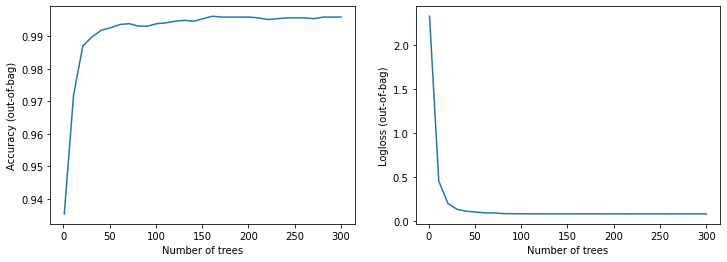

In [19]:
logs = model.make_inspector().training_logs()
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")
plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")
plt.show()

In [20]:
predictions = model.predict(test_ds)
y_pred = np.argmax(predictions, axis=1)
ds_test.insert(1, 'y_test', y_test)
ds_test.insert(1, 'y_pred', y_pred)

labeldict = dict(zip(labeldisease,labeldiseasetext))
diseasepred = list(map(lambda x : labeldict[x], y_pred))
ds_test.insert(1, 'Disease_pred', diseasepred)

ds_test

1/1 [==============================] - 0s 317ms/step


value,Disease,Disease_pred,y_pred,y_test,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
index,,,,,,,,,,,,,,,,,,,,,
2,Fungal infection,Fungal infection,15,15,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,Fungal infection,Fungal infection,15,15,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14,Allergy,Allergy,4,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,Allergy,Allergy,4,4,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,Allergy,Allergy,4,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4902,Hepatitis E,Hepatitis E,22,22,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4905,Common Cold,Common Cold,10,10,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4908,Heart attack,Heart attack,18,18,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Confusion Matrix dan Classification Report

Pada bagian ini akan dibuat modelnya


## Saving Notebooks To GitHub or Drive

Any time you open a GitHub hosted notebook in Colab, it opens a new editable view of the notebook. You can run and modify the notebook without worrying about overwriting the source.

If you would like to save your changes from within Colab, you can use the File menu to save the modified notebook either to Google Drive or back to GitHub. Choose **File→Save a copy in Drive** or **File→Save a copy to GitHub** and follow the resulting prompts. To save a Colab notebook to GitHub requires giving Colab permission to push the commit to your repository.